In [1]:
#Dataset--->salary.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("Salary_data.csv")

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

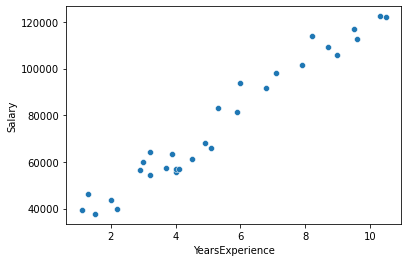

In [12]:
#EDA
sns.scatterplot(x="YearsExperience", y="Salary", data=df)

In [13]:
#Linear regression may work on this dataset

In [14]:
#missing data check:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [19]:
#no character column
#no  outliers as seen from the sctter plot above
#scaling should be done
x=df[["YearsExperience"]]
y=df[["Salary"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,)

In [20]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_s=scalar.fit_transform(x_train)
x_test_s=scalar.transform(x_test)

In [22]:
#lets try linear regression models
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(x_train_s, y_train)

LinearRegression()

In [23]:
y_pred=model_LR.predict(x_test_s)

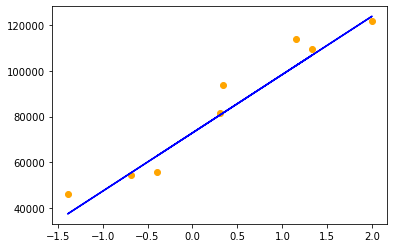

In [31]:
plt.scatter(x_test_s,y_test, color="orange")
plt.plot(x_test_s, y_pred, color="blue")

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
mean_squared_error(y_test, y_pred)

53059447.48748152

In [35]:
r2_score(y_test, y_pred)

0.9312046527436729

In [36]:
#here the r2score predicted is decent ---> 93.12046527436729 %

Let's try polynomials

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly=PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
model_PLG=LinearRegression()
model_PLG.fit(x_poly_train, y_train)
x_poly_test=poly.transform(x_test)
y_pred=model_PLG.predict(x_poly_test)

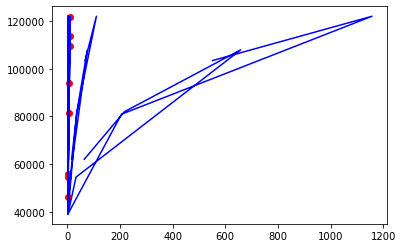

In [61]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_poly_test, y_pred, color="blue")

In [62]:
r2_score(y_test, y_pred)

0.9442436780920785

In [63]:
#we can see here that the accuracy increased by 1% approx

In [82]:
poly=PolynomialFeatures(degree=5)
x_poly_train=poly.fit_transform(x_train)
model_PLG=LinearRegression()
model_PLG.fit(x_poly_train, y_train)
x_poly_test=poly.transform(x_test)
y_pred=model_PLG.predict(x_poly_test)

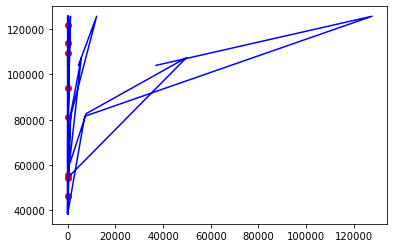

In [83]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_poly_test, y_pred, color="blue")

In [84]:
r2_score(y_test, y_pred)

0.9467798474612621

In [ ]:
#after trying all the degrees we found that of all degree=5 gives the maximum r2_score
#--->94.67798474612621%